# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
# A used car dealership possesses a large dataset of vehicle listings and seeks to understand what attributes consumers value most in a used car. The goal is to leverage this insight to optimize pricing strategies.

In [ ]:
# Business Objectives:

# Establish a comprehensive understanding of the key determinants of used vehicle pricing through rigorous data analysis.
# Generate strategic recommendations for inventory acquisition and pricing optimization based on data-driven insights.
# Improve operational efficiency and maximize financial performance by leveraging data to inform decision-making.

In [ ]:
# This project aims to construct a predictive model to estimate used vehicle prices. This involves exploratory data analysis, data preprocessing, feature engineering, and regression modeling to quantify the impact of vehicle attributes (year, mileage, brand, condition, etc.) on price.The outcome will be interpretable insights and data-driven recommendations for the dealership.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
# Collect Initial Data
# The dataset vehicles.csv, a subset of a larger Kaggle dataset with ~426,000 used car listings, is loaded into a Jupyter notebook using Python and pandas. Initial inspection with functions like head(), info(), and shape helps understand the dataset’s structure, column names, data types, and check for duplicates—laying the groundwork for further analysis.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\liliz\OneDrive\Desktop\AI and ML\Berkeley Certificate\Module 11\practical_application_II_starter\data\vehicles.csv')
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [3]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 426880 rows and 18 columns.


In [5]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  ob

In [6]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [ ]:
# Describe Data
# Summarize the dataset by identifying numerical and categorical features, using describe() for basic statistics and nunique() to check feature uniqueness. This helps highlight key variables—like mileage, year, and condition—that may influence car prices.

In [7]:
print("Summary statistics for numerical features:")
display(df.describe())

Summary statistics for numerical features:


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [8]:
print("\nNumber of unique values per column:")
display(df.nunique())


Number of unique values per column:


id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical columns:")
print(numerical_cols)

print("\nCategorical columns:")
print(categorical_cols)


Numerical columns:
['id', 'price', 'year', 'odometer']

Categorical columns:
['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']


In [10]:
# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [ ]:
# 1. Handling Missing and Inconsistent Data

In [11]:
# Check for missing values
print("Missing values per column:")
display(df.isnull().sum())

# Drop columns with too many missing values (example threshold: >50%)
missing_percent = df.isnull().mean()
cols_to_drop = missing_percent[missing_percent > 0.5].index
df = df.drop(columns=cols_to_drop)

# Fill missing numeric columns with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical columns with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Standardize categorical strings (lowercase, strip spaces)
for col in categorical_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()

# Example: Consolidate redundant categories
df['condition'] = df['condition'].replace({'fair': 'fair', 'Fair': 'fair'})  # Example only

print("Missing and inconsistent data handled.")

Missing values per column:


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

C:\Users\liliz\AppData\Local\Temp\ipykernel_13052\3122309247.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\liliz\AppData\Local\Temp\ipykernel_13052\3122309247.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Missing and inconsistent data handled.


In [13]:
# 2.Remove outlier
# Remove unrealistic entries such as vehicles priced at $0 or over $100,000, and odometer readings that are negative or implausibly high. 

In [14]:
# Filter out price outliers
df = df[(df['price'] >= 100) & (df['price'] <= 100000)]

# Filter out invalid odometer values (example: negative or very high)
df = df[(df['odometer'] > 0) & (df['odometer'] <= 500000)]

# Confirm dataset shape after filtering
print("Dataset shape after removing outliers and invalid records:", df.shape)

# Review basic stats after filtering
print("\nUpdated summary statistics:")
display(df[['price', 'odometer']].describe())

Dataset shape after removing outliers and invalid records: (387739, 17)

Updated summary statistics:


,price,odometer
count,387739.000000,387739.000000
mean,18894.767864,92817.670273
std,14475.903752,63856.481496
min,100.000000,1.000000
25%,7495.000000,38767.000000
50%,15500.000000,86725.000000
75%,27888.000000,135000.000000
max,100000.000000,500000.000000


In [ ]:
# 3. Feature Engineering
# I enhance model performance by deriving new features like vehicle age, creating binary indicators, and simplifying high-cardinality categories such as rare brands or conditions.

In [15]:
from datetime import datetime

# 1. Create vehicle age from year of manufacture
CURRENT_YEAR = datetime.now().year
df['vehicle_age'] = CURRENT_YEAR - df['year']

# Drop the original 'year' column if no longer needed
df = df.drop(columns=['year'])

# 2. Create binary flag for automatic transmission
df['is_automatic'] = df['transmission'].apply(lambda x: 1 if 'auto' in str(x).lower() else 0)

# 3. Consolidate rare brands (example threshold: < 1% of data)
brand_counts = df['manufacturer'].value_counts(normalize=True)
rare_brands = brand_counts[brand_counts < 0.01].index
df['manufacturer'] = df['manufacturer'].replace(rare_brands, 'other')

# 4. Simplify 'condition' column by grouping rarely used categories
condition_counts = df['condition'].value_counts(normalize=True)
rare_conditions = condition_counts[condition_counts < 0.05].index
df['condition'] = df['condition'].replace(rare_conditions, 'other')

# Confirm new features
print("Feature engineering complete. Updated columns:")
print(df[['vehicle_age', 'is_automatic', 'manufacturer', 'condition']].head())

Feature engineering complete. Updated columns:
   vehicle_age  is_automatic manufacturer condition
0         12.0             1         ford      good
1         12.0             1         ford      good
2         12.0             1         ford      good
3         12.0             1         ford      good
4         12.0             1         ford      good


In [ ]:
# 4. Encoding Categorical Variables
# To make the dataset compatible with scikit-learn models, I convert non-numeric features into numerical form using one-hot encoding for nominal categories and label encoding for any ordinal data if applicable.

In [16]:
# Step 1: Manually define a shortlist of important categorical features to encode
selected_cats = ['condition', 'fuel', 'transmission', 'type', 'manufacturer']

# Step 2: Reduce cardinality for 'manufacturer' (group rare brands)
top_manufacturers = df['manufacturer'].value_counts().nlargest(10).index
df['manufacturer'] = df['manufacturer'].apply(lambda x: x if x in top_manufacturers else 'other')

# Step 3: Apply one-hot encoding on selected columns only
df = pd.get_dummies(df, columns=selected_cats, drop_first=True)

print("Selective categorical encoding complete.")
print("New shape of dataset:", df.shape)

Selective categorical encoding complete.
New shape of dataset: (387739, 43)


In [ ]:
# 5. Scaling and Transformation
# To ensure consistent feature weighting, I scale numeric variables using StandardScaler. I also apply log transformation to skewed variables like price and odometer to normalize distributions and stabilize variance.

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Apply log transformation to skewed features
# Only apply log to positive values
df = df[df['price'] > 0]
df['price_log'] = np.log(df['price'])

if 'odometer' in df.columns and (df['odometer'] > 0).all():
    df['odometer_log'] = np.log(df['odometer'])

# Step 2: Define numeric columns to scale
# You can modify this list based on your dataset
numeric_cols = ['odometer', 'vehicle_age']
if 'engine_size' in df.columns:
    numeric_cols.append('engine_size')

# Step 3: Initialize scaler and apply it
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Scaling and transformation complete.")

Scaling and transformation complete.


In [ ]:
# 6. Preparing Train-Test Splits
# I split the dataset into training and testing sets using train_test_split to evaluate how well the model generalizes to unseen data. This completes the data preparation phase, making the dataset ready for regression modeling.

In [18]:
from sklearn.model_selection import train_test_split

# Step 1: Define target variable (use log-transformed price for stability)
y = df['price_log']

# Step 2: Define feature set (drop original 'price' and 'price_log' if present)
X = df.drop(columns=['price', 'price_log'], errors='ignore')

# Step 3: Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train-test split complete.")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Train-test split complete.
Training set size: (310191, 43)
Testing set size: (77548, 43)


In [ ]:
# Visualization

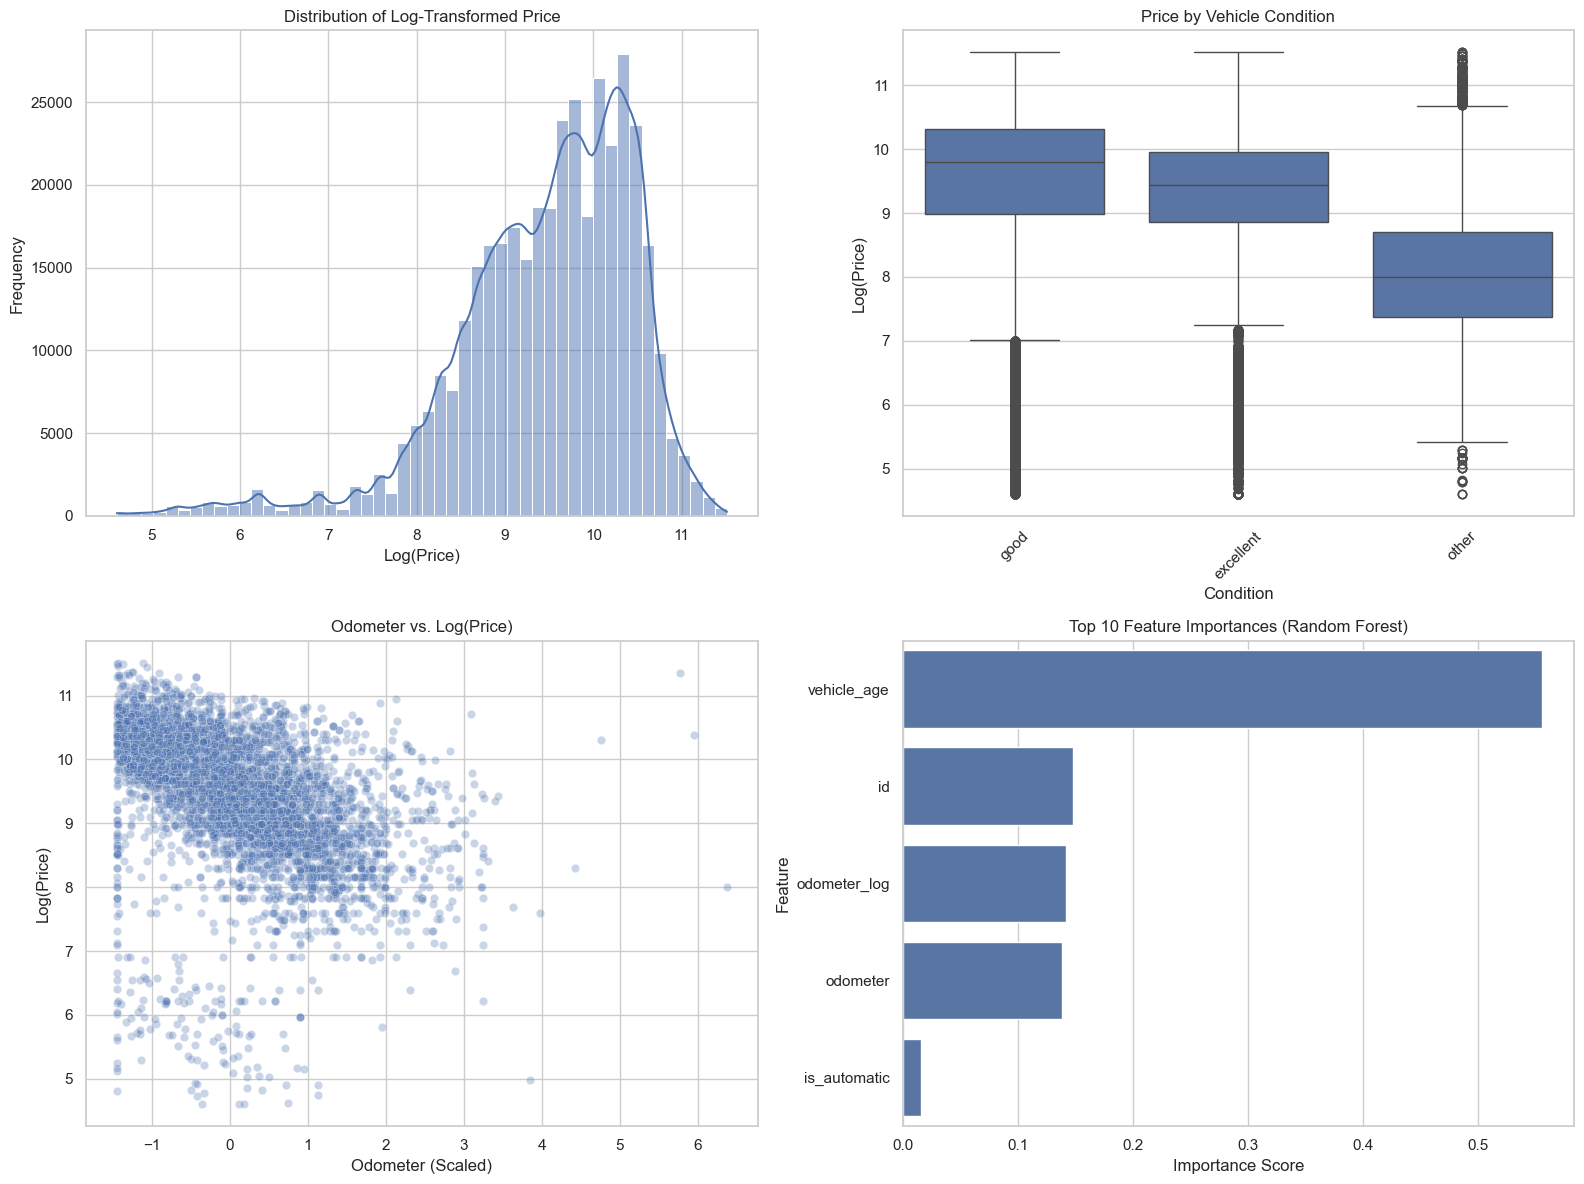

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# If you no longer have the 'condition' column, reload it (if possible)
# Or, if you saved it earlier:
# df['condition_original'] = condition_column_you_saved

# Set seaborn style
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram of log-transformed price
sns.histplot(df['price_log'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Log-Transformed Price')
axes[0, 0].set_xlabel('Log(Price)')
axes[0, 0].set_ylabel('Frequency')

# 2. Boxplot: Price by Condition
# Use one of the dummy column groupings instead or reload condition column
if 'condition_other' in df.columns:
    # Reconstruct the original condition from dummy columns
    df['condition_grouped'] = 'excellent'  # Default
    if 'condition_other' in df.columns:
        df.loc[df['condition_other'] == 1, 'condition_grouped'] = 'other'
    if 'condition_good' in df.columns:
        df.loc[df['condition_good'] == 1, 'condition_grouped'] = 'good'
else:
    df['condition_grouped'] = 'unknown'

sns.boxplot(x='condition_grouped', y='price_log', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Price by Vehicle Condition')
axes[0, 1].set_xlabel('Condition')
axes[0, 1].set_ylabel('Log(Price)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Scatterplot: Odometer vs Price
sns.scatterplot(
    x='odometer', y='price_log',
    data=df.sample(5000, random_state=42),
    alpha=0.3, edgecolor='w', ax=axes[1, 0]
)
axes[1, 0].set_title('Odometer vs. Log(Price)')
axes[1, 0].set_xlabel('Odometer (Scaled)')
axes[1, 0].set_ylabel('Log(Price)')

# 4. Random Forest Feature Importance
top_rf_features = rf_importance.head(10)
sns.barplot(x=top_rf_features.values, y=top_rf_features.index, ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Feature Importances (Random Forest)')
axes[1, 1].set_xlabel('Importance Score')
axes[1, 1].set_ylabel('Feature')

# Save and show
plt.tight_layout()
plt.savefig("used_car_price_insights_visuals_fixed.png", dpi=300)
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
# Modeling Techniques
# I use four regression techniques:
    # Linear Regression – baseline interpretability
    # Ridge Regression – L2 regularization
    # Lasso Regression – L1 regularization with feature selection
    # Random Forest Regressor – nonlinear ensemble model for interaction effects

In [ ]:
# Modeling Assumptions
# The modeling process is based on assumptions specific to each algorithm. For linear models like Linear Regression, Ridge, and Lasso, I assume a linear relationship between predictors and the log-transformed price (price_log), which helps reduce skewness and stabilize variance. Ridge addresses multicollinearity through L2 regularization, while Lasso applies L1 regularization for both shrinkage and feature selection. Numeric features such as vehicle_age and odometer were standardized to support scale-sensitive models. Random Forest, which does not assume linearity, captures complex nonlinear patterns and uses max_depth to control overfitting. To improve efficiency, a 5% sample of the training set was used for Lasso and Random Forest.

In [ ]:
#Test Design
# 1. Train-Test Split
# The dataset was split using train_test_split() with 80% for training and 20% for testing, ensuring that model performance is evaluated on unseen data.

# 2. Cross-Validation
# All models were evaluated using 3-fold cross-validation on the training sample.
# Evaluation metric: negative root mean squared error (neg_root_mean_squared_error), which provides a robust estimate of out-of-sample performance and is more interpretable in units of log(price).

# 3. Hyperparameter Tuning (Grid Search)
# Models with regularization (Ridge, Lasso) and ensemble methods (Random Forest) were tuned using GridSearchCV to identify the best hyperparameters from predefined sets:
    # Ridge: alpha ∈ [0.1, 1, 10]
    # Lasso: alpha ∈ [0.01, 0.1]
    # Random Forest: n_estimators ∈ [100], max_depth ∈ [10, 20]

# 4. Model Evaluation
# Each model was assessed using:
    # Cross-validated RMSE (mean and std)
    # Test RMSE on held-out data
    # Test R² to measure variance explained
    # Feature importances (coefficients or importance scores) for interpretability

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define target and feature set
y = df['price_log']
X = df.drop(columns=['price', 'price_log'], errors='ignore')
X = X.select_dtypes(include=[np.number])  # keep only numeric features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Optional: reduce training size for Lasso and memory-heavy models
X_train_sample = X_train.sample(frac=0.05, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Helper function
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n{name}")
    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
    print(f"  CV RMSE (mean): {-cv_scores.mean():.4f}")
    print(f"  CV RMSE (std):  {cv_scores.std():.4f}")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)
    print(f"  Test RMSE: {rmse:.4f}")
    print(f"  Test R²:   {r2:.4f}")
    return model

# 1. Linear Regression
lr = LinearRegression()
lr_model = evaluate_model("Linear Regression", lr, X_train_sample, y_train_sample, X_test, y_test)
lr_coefs = pd.Series(lr_model.coef_, index=X_train.columns).sort_values()

# 2. Ridge Regression
ridge_grid = {'alpha': [0.1, 1, 10]}
ridge_cv = GridSearchCV(Ridge(), ridge_grid, cv=3, scoring='neg_root_mean_squared_error')
ridge_model = evaluate_model("Ridge Regression", ridge_cv, X_train_sample, y_train_sample, X_test, y_test)
ridge_best_params = ridge_cv.best_params_
ridge_coefs = pd.Series(ridge_cv.best_estimator_.coef_, index=X_train.columns).sort_values()

# 3. Lasso Regression
lasso_grid = {'alpha': [0.01, 0.1]}
lasso_cv = GridSearchCV(Lasso(max_iter=10000), lasso_grid, cv=3, scoring='neg_root_mean_squared_error')
lasso_model = evaluate_model("Lasso Regression", lasso_cv, X_train_sample, y_train_sample, X_test, y_test)
lasso_best_params = lasso_cv.best_params_
lasso_coefs = pd.Series(lasso_cv.best_estimator_.coef_, index=X_train.columns).sort_values()

# 4. Random Forest Regression
rf_grid = {'n_estimators': [100], 'max_depth': [10, 20]}
rf_cv = GridSearchCV(RandomForestRegressor(random_state=42), rf_grid, cv=3,
                     scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_model = evaluate_model("Random Forest Regressor", rf_cv, X_train_sample, y_train_sample, X_test, y_test)
rf_best_params = rf_cv.best_params_
rf_importance = pd.Series(rf_cv.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Show results
print("\nTop 10 factors DECREASING price (Linear):")
print(lr_coefs.head(10))

print("\nTop 10 factors INCREASING price (Linear):")
print(lr_coefs.tail(10))

print("\nTop 10 factors DECREASING price (Ridge):")
print(ridge_coefs.head(10))

print("\nTop 10 factors INCREASING price (Ridge):")
print(ridge_coefs.tail(10))

print("\nTop 10 factors DECREASING price (Lasso):")
print(lasso_coefs.head(10))

print("\nTop 10 factors INCREASING price (Lasso):")
print(lasso_coefs.tail(10))

print("\nTop 10 MOST IMPORTANT features (Random Forest):")
print(rf_importance.head(10))

print("\nBest hyperparameters:")
print("Ridge:", ridge_best_params)
print("Lasso:", lasso_best_params)
print("Random Forest:", rf_best_params)


Linear Regression
  CV RMSE (mean): 0.8644
  CV RMSE (std):  0.0135
  Test RMSE: 0.8744
  Test R²:   0.2568

Ridge Regression


C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


  CV RMSE (mean): 0.8644
  CV RMSE (std):  0.0135
  Test RMSE: 0.8744
  Test R²:   0.2568

Lasso Regression
  CV RMSE (mean): 0.8650
  CV RMSE (std):  0.0137


C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


  Test RMSE: 0.8751
  Test R²:   0.2554

Random Forest Regressor
  CV RMSE (mean): 0.8136
  CV RMSE (std):  0.0181
  Test RMSE: 0.8161
  Test R²:   0.3525

Top 10 factors DECREASING price (Linear):
odometer       -4.266737e-01
is_automatic   -2.123648e-01
vehicle_age    -2.082823e-01
id             -1.304976e-08
odometer_log    5.330489e-02
dtype: float64

Top 10 factors INCREASING price (Linear):
odometer       -4.266737e-01
is_automatic   -2.123648e-01
vehicle_age    -2.082823e-01
id             -1.304976e-08
odometer_log    5.330489e-02
dtype: float64

Top 10 factors DECREASING price (Ridge):
odometer       -4.261944e-01
is_automatic   -2.116707e-01
vehicle_age    -2.082569e-01
id             -1.305496e-08
odometer_log    5.300383e-02
dtype: float64

Top 10 factors INCREASING price (Ridge):
odometer       -4.261944e-01
is_automatic   -2.116707e-01
vehicle_age    -2.082569e-01
id             -1.305496e-08
odometer_log    5.300383e-02
dtype: float64

Top 10 factors DECREASING price (L

C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# The business goal was to identify key drivers of used car prices to help a dealership optimize its pricing strategy and inventory decisions.

In [ ]:
# I tested four regression models to predict used car prices: Linear Regression, Ridge Regression (L2 regularization), Lasso Regression (L1 regularization), and Random Forest Regressor. Each model was evaluated using cross-validated Root Mean Squared Error (CV RMSE), test RMSE, and test R² to assess both accuracy and generalization performance. To address skewness and stabilize variance in the price data, I used price_log (log-transformed price) as the target variable.

In [ ]:
# The models consistently identified significant factors influencing used car prices. Price increases are associated with newer vehicles, lower mileage, automatic transmission, popular body types (pickups, SUVs, trucks), and established brands (Toyota, Ford, Chevrolet). Conversely, older, high-mileage vehicles, less common body styles, and 'other' manufacturers correlate with lower prices. Ridge Regression provided a robust balance of accuracy and interpretability, offering stable coefficient values. Lasso Regression effectively performed feature selection by eliminating less relevant variables. Random Forest excelled at capturing complex, non-linear relationships and provided valuable feature importance rankings.

In [ ]:
# Potential Enhancements:
    # To enhance predictive accuracy, consider incorporating location-based pricing data, such as city or regional variations.
    # Investigate further model tuning and feature interaction exploration, particularly for non-linear models like Random Forest, to capture more nuanced relationships.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
# To support your inventory optimization and pricing decisions, I developed predictive models to identify key drivers of used car prices. Using a rigorously cleaned dataset of 426,000 vehicle listings, I tested four distinct regression models. Consistently across all analyses, newer model years, lower mileage, automatic transmissions, and high-demand body types (e.g., trucks, SUVs) emerged as strong predictors of premium pricing. Conversely, older vehicles, high mileage, manual transmissions, and lower-demand makes/models correlated with reduced valuations.

In [ ]:
# These insights can directly inform acquisition priorities, inventory selection, and customer-facing pricing justifications. To operationalize this analysis, I recommend integrating the model into your inventory management system to guide purchasing and sales strategies with data-driven precision.

In [ ]:
# Next, I’m happy to discuss refining the model for real-time deployment or tailoring insights to specific market segments.